In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Important webpages

https://www.youtube.com/watch?v=qAd74omA6AA
    
https://www.psvolpiani.com/courses
    
http://www.thevisualroom.com/sods_test_problem.html#id12

nx = 81
dx = 0.25
dt = 0.0002
gamma = 1.4
halfL = 10

#Discretize the road.
x = np.linspace(-10, halfL, num=nx)

In [2]:
#Web conditions: https://www.psvolpiani.com/courses

CFL    = 0.50               # Courant Number
gamma  = 1.4                # Ratio of specific heats
ncells = 400                # Number of cells
x_ini =0.; x_fin = 1.       # Limits of computational domain
dx = (x_fin-x_ini)/ncells   # Step size
nx = ncells+1               # Number of points
x = np.linspace(x_ini+dx/2.,x_fin,nx) # Mesh
x

array([0.00125   , 0.00374688, 0.00624375, 0.00874063, 0.0112375 ,
       0.01373437, 0.01623125, 0.01872813, 0.021225  , 0.02372187,
       0.02621875, 0.02871563, 0.0312125 , 0.03370937, 0.03620625,
       0.03870312, 0.0412    , 0.04369688, 0.04619375, 0.04869063,
       0.0511875 , 0.05368437, 0.05618125, 0.05867812, 0.061175  ,
       0.06367188, 0.06616875, 0.06866562, 0.0711625 , 0.07365937,
       0.07615625, 0.07865313, 0.08115   , 0.08364687, 0.08614375,
       0.08864063, 0.0911375 , 0.09363438, 0.09613125, 0.09862812,
       0.101125  , 0.10362188, 0.10611875, 0.10861562, 0.1111125 ,
       0.11360937, 0.11610625, 0.11860313, 0.1211    , 0.12359687,
       0.12609375, 0.12859062, 0.1310875 , 0.13358438, 0.13608125,
       0.13857812, 0.141075  , 0.14357187, 0.14606875, 0.14856563,
       0.1510625 , 0.15355937, 0.15605625, 0.15855312, 0.16105   ,
       0.16354688, 0.16604375, 0.16854062, 0.1710375 , 0.17353437,
       0.17603125, 0.17852813, 0.181025  , 0.18352188, 0.18601

In [3]:
rhoL = 1 #kg/m^3
vL = 0 # m/s
pL = 100 # kN/m^2

bcvaluesL = np.array([rhoL,vL,pL])

rhoR = 0.125 #kg/m^3
vR = 0 # m/s
pR = 10 # kN/m^2

bcvaluesR = np.array([rhoR,vR,pR])

In [4]:
bcvaluesL,bcvaluesR

(array([  1,   0, 100]), array([ 0.125,  0.   , 10.   ]))

Initial conditions ICL for -10 <= x < 0 
                   ICR for  0 <= x <= 10

In [5]:
def set_BC(x,bcvaluesL):
    """
    Sets initial boundary condition 
    """
    
    rho = np.zeros_like(x)
    v = np.zeros_like(x)
    p = np.zeros_like(x)
    
    #maskL = np.where(x<0)
    maskL = np.where(x<0.5)
    
    rho[maskL] = bcvaluesL[0]
    v[maskL] = bcvaluesL[1]
    p[maskL] = bcvaluesL[2]
    
    #maskR = np.where(x>=0)
    maskR = np.where(x>=0.5)
    
    rho[maskR] = bcvaluesR[0]
    v[maskR] = bcvaluesR[1]
    p[maskR] = bcvaluesR[2]
    
    return [rho,v,p]

In [6]:
rho0 = set_BC(x,bcvaluesL)[0]
v0 = set_BC(x,bcvaluesL)[1]
p0 = set_BC(x,bcvaluesL)[2]

In [7]:

E0 = p0/((gamma-1.)*rho0)+0.5*v0**2
a0 = np.sqrt(gamma*p0/rho0)            # Speed of sound

dt=CFL*dx/max(abs(v0)+a0)  

In [8]:
tfinal = 0.01 #s
nt = int(tfinal/dt)
nt

94

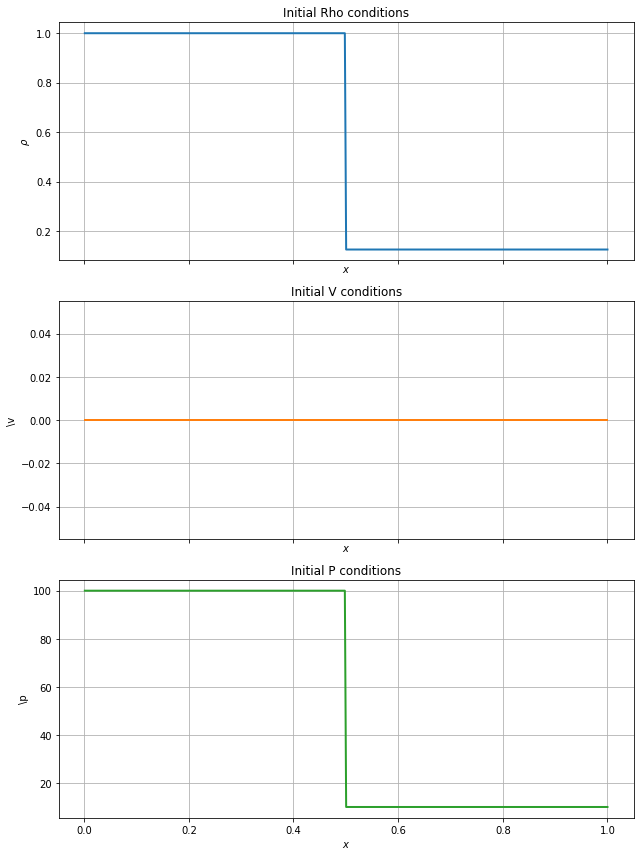

In [9]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True)

ax0.set_title('Initial Rho conditions')
ax0.set_ylabel(r'$\rho$')
ax0.set_xlabel(r'$x$')
ax0.plot(x, rho0,color='C0', linestyle='-', linewidth=2)[0]

ax0.grid()

ax1.set_title('Initial V conditions')
ax1.set_ylabel(r'\v')
ax1.set_xlabel(r'$x$')
ax1.plot(x, v0,color='C1', linestyle='-', linewidth=2)[0]

ax1.grid()

ax2.set_title('Initial P conditions')
ax2.set_ylabel(r'\p')
ax2.set_xlabel(r'$x$')
ax2.plot(x, p0,color='C2', linestyle='-', linewidth=2)[0]

ax2.grid()

fig.set_size_inches(9,12)
plt.tight_layout()

In [10]:
u1 = rho0
u2 = rho0*v0
u3 = p0/(gamma-1)+1/2*rho0*v0**2
u0 = np.array([u1,u2,u3])
u0

array([[1.00e+00, 1.00e+00, 1.00e+00, ..., 1.25e-01, 1.25e-01, 1.25e-01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.50e+02, 2.50e+02, 2.50e+02, ..., 2.50e+01, 2.50e+01, 2.50e+01]])

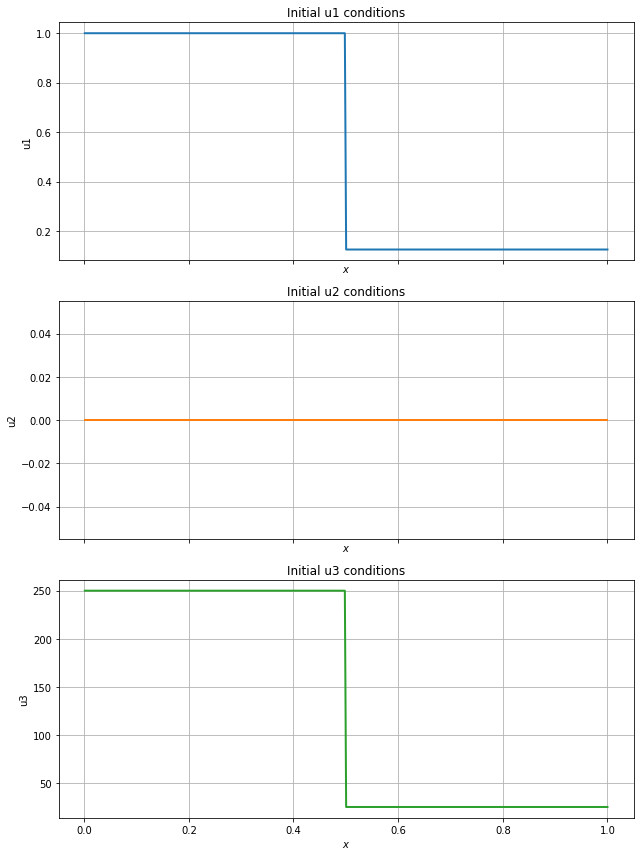

In [11]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True)

ax0.set_title('Initial u1 conditions')
ax0.set_ylabel(r'u1')
ax0.set_xlabel(r'$x$')
ax0.plot(x, u1,color='C0', linestyle='-', linewidth=2)[0]

ax0.grid()

ax1.set_title('Initial u2 conditions')
ax1.set_ylabel(r'u2')
ax1.set_xlabel(r'$x$')
ax1.plot(x, u2,color='C1', linestyle='-', linewidth=2)[0]

ax1.grid()

ax2.set_title('Initial u3 conditions')
ax2.set_ylabel(r'u3')
ax2.set_xlabel(r'$x$')
ax2.plot(x, u3,color='C2', linestyle='-', linewidth=2)[0]

ax2.grid()

fig.set_size_inches(9,12)
plt.tight_layout()

In [12]:
def flux(u,gamma):
    """
    Returns the right-hand side of the phugoid system of equations.
    Returns
    -------
    rhs : numpy.ndarray
    """
    u1,u2,u3 = u
    
    F = np.array([u2,
                    u2**2/u1+(gamma-1)*(u3-1/2*u2**2/u1),
                    (u3+(gamma-1)*(u3-1/2*u2**2/u1))*u2/u1])
    return F
    

In [13]:
def richtmyer(u0, nt, dt, dx,bcvaluesL,bcvaluesR, *args):
    """
    Computes the traffic density on the road 
    at a certain time given the initial traffic density.
    Integration using MacCormack scheme.
    
    Parameters
    ----------
    rho0 : numpy.ndarray
        The initial traffic density along the road
        as a 1D array of floats.
    nt : integer
        The number of time steps to compute.
    dt : float
        The time-step size to integrate.
    dx : float
        The distance between two consecutive locations.
    bc_values : 2-tuple of floats
        The value of the density at the first and last locations.
    args : list or tuple
        Positional arguments to be passed to the flux function.
    
    Returns
    -------
    rho_hist : list of numpy.ndarray objects
        The history of the car density along the road.
    """
        
    u_hist = [u0.copy()]
    u = u0.copy()
    
    
    for n in range(nt):
        # Compute the flux.
        F = flux(u, *args)
        Fjm = F[:,:-2] #F(rho(j-1))
        Fj = F[:,1:-1] #F(rho(j))
        Fjp = F[:,2:]  #F(rho(j+1))
        
        # Predictor step of the MacCormack scheme.
        ujm = u[:,:-2].copy() #rho(j-1)
        uj = u[:,1:-1].copy() #rho(j)
        ujp = u[:,2:].copy() #rho(j+1)
        
        up_p = 1/2*(ujp+uj)-dt/(2*dx)*(Fjp-Fj)
        up_m = 1/2*(uj+ujm)-dt/(2*dx)*(Fj-Fjm)
        # Compute the flux.
        Fm = flux(up_m, *args)
        Fp = flux(up_p, *args)
        # Corrector step of the Richtmyer scheme.
        u[:,1:-1] = u[:,1:-1]-dt/dx*(Fp-Fm)
        # Set the value at the first location.
        u[:,0] = u0[:,0]
        # Set the value at the last location.
        u[:,-1] = u0[:,-1]
        # Record the time-step solution.
        u_hist.append(u.copy())
    return u_hist

In [14]:
u_hist = richtmyer(u0,nt,dt,dx,bcvaluesL,bcvaluesR,gamma)

In [15]:
u_hist[-1][0]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [16]:
rho = u_hist[-1][0]
v = u_hist[-1][1]/u_hist[-1][0]
p = (gamma-1)*(u_hist[-1][2]-1/2*u_hist[-1][1]**2/u_hist[-1][0])

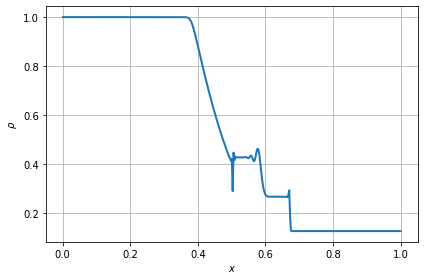

In [17]:
# Plot the initial traffic density.
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'$\rho$')
plt.grid()
line = plt.plot(x, rho,
                   color='C0', linestyle='-', linewidth=2)[0]
#plt.xlim(0.0, L)
#plt.ylim(4.0, 11.0)
plt.tight_layout()

In [18]:
from matplotlib import animation
from IPython.display import HTML

In [19]:
def update_plot(n, u_hist):
    """
    Update the line y-data of the Matplotlib figure.
    
    Parameters
    ----------
    n : integer
        The time-step index.
    rho_hist : list of numpy.ndarray objects
        The history of the numerical solution.
    """
    fig.suptitle('Time step {:0>2}'.format(n))
    line.set_ydata(u_hist[n][0])

In [20]:
# Create an animation of the traffic density.
anim = animation.FuncAnimation(fig, update_plot,
                               frames=nt, fargs=(u_hist,),
                               interval=100)
# Display the video.
HTML(anim.to_html5_video())

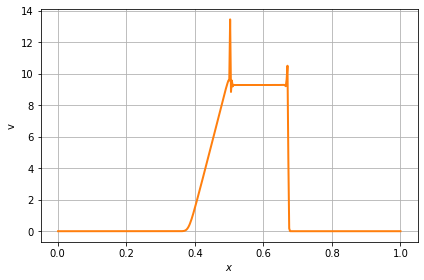

In [21]:
# Plot the initial traffic density.
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'v')
plt.grid()
line = plt.plot(x, v,
                   color='C1', linestyle='-', linewidth=2)[0]
#plt.xlim(0.0, L)
#plt.ylim(4.0, 11.0)
plt.tight_layout()

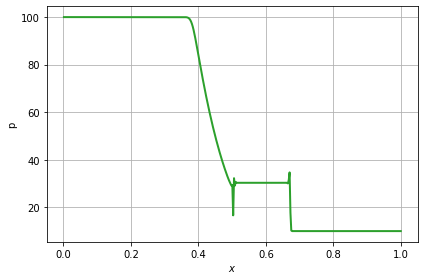

In [22]:
# Plot the initial traffic density.
fig = plt.figure(figsize=(6.0, 4.0))
plt.xlabel(r'$x$')
plt.ylabel(r'p')
plt.grid()
line = plt.plot(x, p,
                   color='C2', linestyle='-', linewidth=2)[0]
#plt.xlim(0.0, L)
#plt.ylim(4.0, 11.0)
plt.tight_layout()

In [23]:
x[50]

0.12609375